# Домашнее задание - практика на основе кода лекции


Вам нужно будет скопировать нужные куски кода и немного их трансформировать чтобы они помогли решить поставленные задачи. 

*Использовать большие куски готового кода в анализе данных частая практика. Цель понять данные и каким-то образом, нужным нам их трансформировать, а код - просто инструмент.*


## Подгрузка данных

Здесь подгружается другой датасет

In [ ]:
!gdown --id 1KRpL2q6RZn1YHI2IfFeTKxuKpEUQNenZ

Downloading...
From: https://drive.google.com/uc?id=1KRpL2q6RZn1YHI2IfFeTKxuKpEUQNenZ
To: /content/groups.csv
100% 206k/206k [00:00<00:00, 23.1MB/s]


In [ ]:
import pandas as pd # Библиотека для работы с таблицами
import numpy as np # Библиотека для работы с массивами и матрицами
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('groups.csv',';').drop('Unnamed: 4',axis = 1)
classes = {class_:i for i, class_ in enumerate(df['Предмет'].unique())}
df['label'] = df['Предмет'].replace(classes)

In [ ]:
df

,id,URL,Название,Предмет,label
0,72894053,https://vk.com/club72894053,Биология: материалы к олимпиадам и экзаменам,биология,0
1,47693493,https://vk.com/club47693493,Биология+химия-easy;) c Aleksandra LearnBiolog...,биология,0
2,37948240,https://vk.com/club37948240,Биология,биология,0
3,109143834,https://vk.com/club109143834,B.o.S - Биология Спорта,биология,0
4,32140813,https://vk.com/club32140813,Углублённый Биолог,биология,0
...,...,...,...,...,...
1784,43732804,https://vk.com/club43732804,Кодексы и законы РФ,юриспруденция,18
1785,28799949,https://vk.com/club28799949,Закон.ру,юриспруденция,18
1786,42832964,https://vk.com/club42832964,Колледж АлтГУ,вуз,19
1787,40575907,https://vk.com/club40575907,КиберЛенинка,наука,20


## Обзор данных - что у нас за данные? (занятие 1)

Задания:


*   Наривсовать pie диограмму или гистограмму на основе колнки предметов. Или другими способами узнать балланс классов(число экземпляров каждого класса)
*   Посмотреть среднее количество слов колонки `Название`



# **Решение**









In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1789 non-null   int64 
 1   URL       1789 non-null   object
 2   Название  1789 non-null   object
 3   Предмет   1789 non-null   object
 4   label     1789 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 70.0+ KB


In [ ]:
 df['Предмет'].value_counts()

учёба (курсы, программы, ЕГЭ)    263
иностранные языки                256
литература                       174
психология                       150
искусство                        146
история                          114
вуз                               85
обществознание                    83
математика                        78
техника и технологии              76
химия                             49
русский язык                      49
биология                          49
культура                          45
физика                            45
информатика                       25
география                         24
философия                         23
юриспруденция                     17
геометрия                         14
наука                             14
философия и эзотерика             10
Name: Предмет, dtype: int64

In [ ]:
df['Предмет']

0            биология
1            биология
2            биология
3            биология
4            биология
            ...      
1784    юриспруденция
1785    юриспруденция
1786              вуз
1787            наука
1788              вуз
Name: Предмет, Length: 1789, dtype: object

In [ ]:
value_counts = df['Предмет'].value_counts()

# преобразование в df и присвоение новых имен колонкам
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Предмет', 'Количество']
df_value_counts
#df_value_counts.info()

,Предмет,Количество
0,"учёба (курсы, программы, ЕГЭ)",263
1,иностранные языки,256
2,литература,174
3,психология,150
4,искусство,146
5,история,114
6,вуз,85
7,обществознание,83
8,математика,78
9,техника и технологии,76


In [ ]:
df_value_counts.set_index('Предмет', inplace=True)

In [ ]:
df_value_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, учёба (курсы, программы, ЕГЭ) to философия и эзотерика
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Количество  22 non-null     int64
dtypes: int64(1)
memory usage: 352.0+ bytes


In [ ]:
df_value_counts

,Количество
Предмет,
"учёба (курсы, программы, ЕГЭ)",263
иностранные языки,256
литература,174
психология,150
искусство,146
история,114
вуз,85
обществознание,83
математика,78


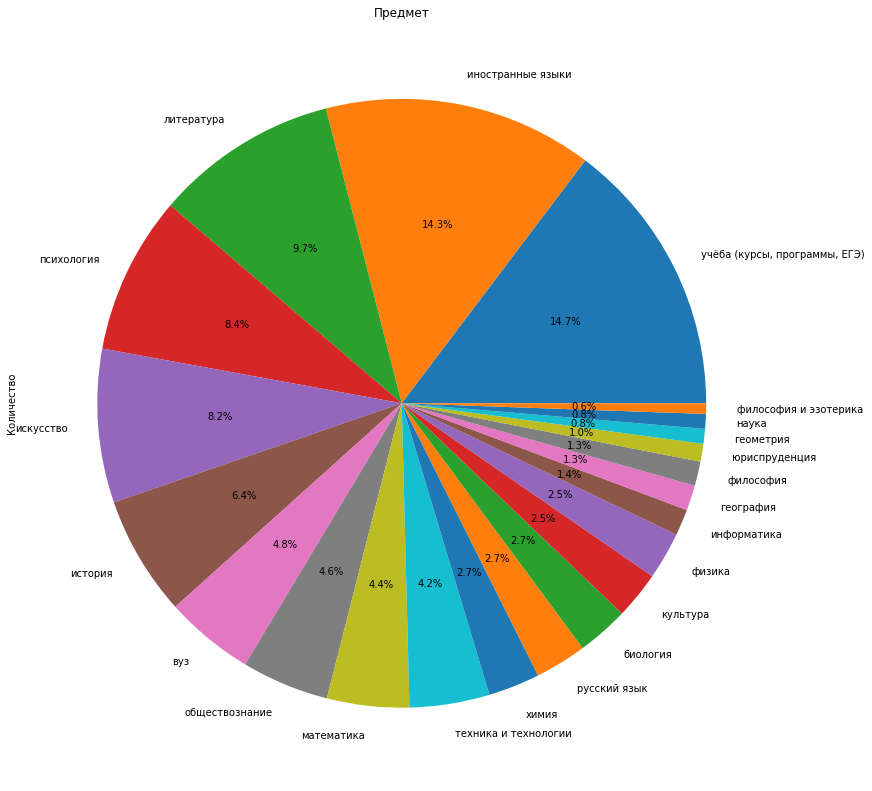

In [ ]:
df_value_counts.plot.pie(y = 'Количество', title = "Предмет", legend = False, autopct='%1.1f%%', figsize=(14,14))   



(-1.1037866919673494,
 1.1001803189701271,
 -1.1013848842172296,
 1.1106302513725594)

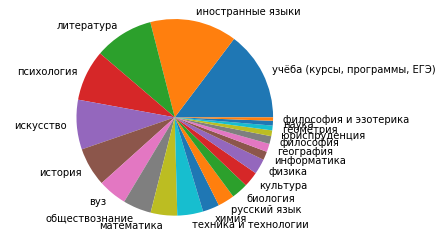

In [ ]:
vals = df['Предмет'].value_counts().values
labels = df['Предмет'].value_counts().index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

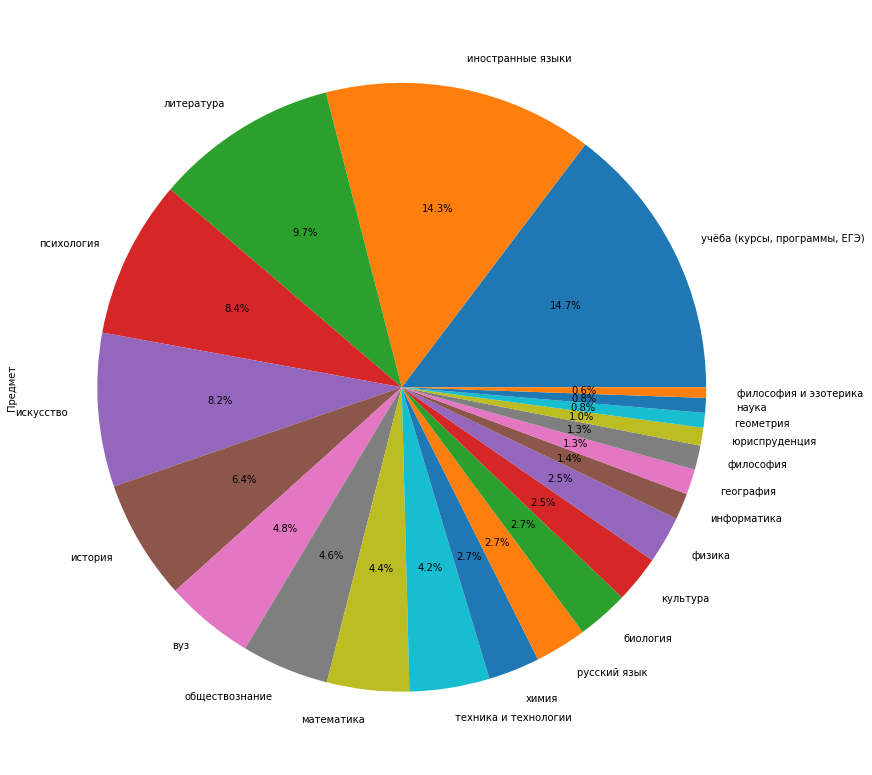

In [ ]:
df['Предмет'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(14,14))

Посмотреть среднее количество слов колонки Название

In [ ]:
count_words = lambda x: len(x.split())

def count_words(x):
  return len(x.split())

In [ ]:
df['count_words'] = df['Название'].apply(count_words)

In [ ]:
df

,id,URL,Название,Предмет,label,count_words
0,72894053,https://vk.com/club72894053,Биология: материалы к олимпиадам и экзаменам,биология,0,6
1,47693493,https://vk.com/club47693493,Биология+химия-easy;) c Aleksandra LearnBiolog...,биология,0,4
2,37948240,https://vk.com/club37948240,Биология,биология,0,1
3,109143834,https://vk.com/club109143834,B.o.S - Биология Спорта,биология,0,4
4,32140813,https://vk.com/club32140813,Углублённый Биолог,биология,0,2
...,...,...,...,...,...,...
1784,43732804,https://vk.com/club43732804,Кодексы и законы РФ,юриспруденция,18,4
1785,28799949,https://vk.com/club28799949,Закон.ру,юриспруденция,18,1
1786,42832964,https://vk.com/club42832964,Колледж АлтГУ,вуз,19,2
1787,40575907,https://vk.com/club40575907,КиберЛенинка,наука,20,1


In [ ]:
df['count_words'].mean()

3.777529346003354

In [ ]:
df['count_words'].max()

10

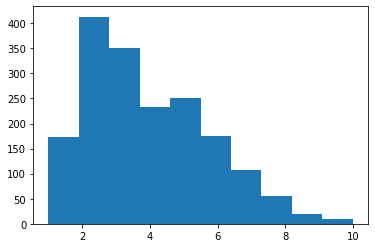

In [ ]:
plt.hist(df['count_words'], bins= 10)    
plt.show()

# Обработка данных

Задания:

*   Сделать стеммированную колонку в **df** на основе колонки **df**['Название']. 
*   Очистить от стоп слов, пунктуации 


In [ ]:
from sklearn.model_selection import cross_val_score # функция подсчета точности
from sklearn.model_selection import train_test_split # функция разбиения на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # векторайзер - преобразует тексты в машинный вид
from sklearn.linear_model import LinearRegression # Модель машинного обучения
from sklearn.metrics import mean_absolute_error # Метрика для оценки ошибки

import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд

nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
#stemmer_ru = SnowballStemmer("russian") 
#ru_stop_words = set(stopwords.words('russian'))
#def stemm_text(text, stemmer, stop_words):
#   """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам"""
#   tokens = [stemmer.stem(word) for word in word_tokenize(text.lower()) if word not in stop_words]
#   tokens = ' '.join(tokens)
#   return tokens


#df['stemmed_overview'] = df['Название'].apply(lambda x: stemm_text(x, stemmer_ru, ru_stop_words)) # генерируем колонку stemmed_overview, прогоняя значения колонки overview через функцию обработки



In [ ]:
def text_processing(text, stemmer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    text = text.lower()
    words = word_tokenize(text) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    
    words = [stemmer.stem(word) for word in words] # стеммируем каждое слово
    new_text = ' '.join(words)

    return new_text

In [ ]:
my_stopwords = stopwords.words("russian")

In [ ]:
ru_stop_words = set(stopwords.words('russian'))

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punctuations = list(string.punctuation)

In [ ]:
df

,id,URL,Название,Предмет,label,count_words
0,72894053,https://vk.com/club72894053,Биология: материалы к олимпиадам и экзаменам,биология,0,6
1,47693493,https://vk.com/club47693493,Биология+химия-easy;) c Aleksandra LearnBiolog...,биология,0,4
2,37948240,https://vk.com/club37948240,Биология,биология,0,1
3,109143834,https://vk.com/club109143834,B.o.S - Биология Спорта,биология,0,4
4,32140813,https://vk.com/club32140813,Углублённый Биолог,биология,0,2
...,...,...,...,...,...,...
1784,43732804,https://vk.com/club43732804,Кодексы и законы РФ,юриспруденция,18,4
1785,28799949,https://vk.com/club28799949,Закон.ру,юриспруденция,18,1
1786,42832964,https://vk.com/club42832964,Колледж АлтГУ,вуз,19,2
1787,40575907,https://vk.com/club40575907,КиберЛенинка,наука,20,1


In [ ]:
stemmer_ru = SnowballStemmer("russian")

In [ ]:
def func(x):
  return text_processing(x, stemmer_ru, ru_stop_words, punctuations)


df['stemmed_overview'] = df['Название'].apply(func)

In [ ]:
df

,id,URL,Название,Предмет,label,count_words,stemmed_overview
0,72894053,https://vk.com/club72894053,Биология: материалы к олимпиадам и экзаменам,биология,0,6,биолог материал олимпиад экзамен
1,47693493,https://vk.com/club47693493,Биология+химия-easy;) c Aleksandra LearnBiolog...,биология,0,4,биология+химия-еас c aleksandr learnbiolog
2,37948240,https://vk.com/club37948240,Биология,биология,0,1,биолог
3,109143834,https://vk.com/club109143834,B.o.S - Биология Спорта,биология,0,4,b.o.s биолог спорт
4,32140813,https://vk.com/club32140813,Углублённый Биолог,биология,0,2,углублен биолог
...,...,...,...,...,...,...,...
1784,43732804,https://vk.com/club43732804,Кодексы и законы РФ,юриспруденция,18,4,кодекс закон рф
1785,28799949,https://vk.com/club28799949,Закон.ру,юриспруденция,18,1,закон.р
1786,42832964,https://vk.com/club42832964,Колледж АлтГУ,вуз,19,2,колледж алтг
1787,40575907,https://vk.com/club40575907,КиберЛенинка,наука,20,1,киберленинк


Обработка стоп слов


In [ ]:
def get_word_counts(texts):
    wordfreq = {}

    for sentence in texts:
        
        for word in word_tokenize(sentence):
            
            if word not in wordfreq:
                wordfreq[word] = 0 
            wordfreq[word] += 1
        
    return {k:v for k,v in sorted(wordfreq.items(), key=lambda kv: kv[1], reverse=True)}

In [ ]:
original_abstract_texts = df['stemmed_overview'].to_list()

original_word_counts = get_word_counts(original_abstract_texts)

In [ ]:
original_word_counts

{'егэ': 343,
 'язык': 181,
 'огэ': 138,
 '2017': 115,
 'ответ': 109,
 'английск': 109,
 'психолог': 108,
 'истор': 92,
 'математик': 66,
 'ги': 53,
 'подготовк': 51,
 'книг': 48,
 'русск': 47,
 'хим': 45,
 'физик': 42,
 'биолог': 36,
 'english': 33,
 'уч': 32,
 'обществознан': 31,
 '2016': 30,
 'росс': 29,
 'литератур': 28,
 'цитат': 28,
 'онлайн': 23,
 'философ': 22,
 '2015': 21,
 'образован': 20,
 'урок': 20,
 'корейск': 20,
 'помощ': 20,
 'искусств': 20,
 'центр': 19,
 'факт': 19,
 'японск': 19,
 '—': 18,
 'мир': 17,
 'япон': 17,
 'курс': 17,
 'решен': 17,
 'стих': 17,
 'stud': 17,
 'подслуша': 17,
 'репетитор': 16,
 'наук': 16,
 'абитуриент': 16,
 'типичн': 15,
 'немецк': 15,
 'художник': 15,
 'географ': 14,
 'культур': 14,
 'слов': 14,
 'книжн': 14,
 'саморазвит': 14,
 'университет': 14,
 'фильм': 13,
 'жизн': 13,
 'статград': 13,
 'олимпиад': 12,
 'путешеств': 12,
 'опрос': 12,
 'китайск': 12,
 'сочинен': 12,
 'рисован': 12,
 'l': 12,
 'велик': 12,
 'ден': 11,
 'in': 11,
 'информ

# Обработка данных (занятие 2)

*   Разбить данные на **train_text**, **train_labels** и **test_text**, **test_labels**
*   На основе **train_text** и **train_labels** матриц обучить модель. В данном случае у нас классификация, а не регрессия. Нужна будет соответствующая модель. Например **DecisionTreeClassifier**. В остальном ее применение такое же как и было с **LinearRegression**
*   Проверить точность на **test_text** и **test_labels**. Нужна будет другая метрика, тк задача классификации, например **f1_score** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

# Пример использования f1_score
y_true = [1,2,3,1,2,3]
y_pred = [1,2,3,1,1,1]
score = f1_score(y_true, y_pred, average='micro')
score # Чем ближе к 1, тем лучше

0.6666666666666666

In [ ]:
train_text, test_text  = train_test_split(df['stemmed_overview'], test_size=0.25, random_state=42)

In [ ]:
train_labels, test_labels = train_test_split(df['label'], test_size=0.25, random_state=42)

In [ ]:
all_text = pd.concat([train_text, test_text])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression

In [ ]:
word_vectorizer = CountVectorizer()

In [ ]:
word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

In [ ]:
train_word_features

<1341x1860 sparse matrix of type '<class 'numpy.int64'>'
	with 4269 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np


In [ ]:
regression = LinearRegression()


regression.fit(train_word_features, train_labels)


pred = regression.predict(test_word_features)
mean_absolute_error(test_labels, pred)

3.3247299055829194

In [ ]:
#фиксируем параметры псевдослучайного генератора
seed = 42

np.random.seed(seed)

In [ ]:
#train_text, test_text   train_labels, test_labels

In [ ]:
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)


results = pd.DataFrame()
for max_depth in range(1, 100, 2):
    clf = DecisionTreeClassifier(random_state=seed, max_depth=max_depth)
    clf = clf.fit(train_word_features, train_labels)
    preds_train = clf.predict(train_word_features)
    preds_test = clf.predict(test_word_features)
    
    results_dict = {
                    'acc_train':[accuracy_score(train_labels, preds_train)],
                    'f1_train':[f1_score(train_labels, preds_train, average='micro')],
                    }
    
    results_df = pd.DataFrame.from_dict(results_dict)
    results = results.append(results_df)

results.reset_index(inplace=True, drop=True)




In [ ]:
results_dict

{'acc_train': [0.843400447427293], 'f1_train': [0.8434004474272931]}

In [ ]:
 results_df

,acc_train,f1_train
0,0.8434,0.8434


In [ ]:
 results 

# Тематическое моделирование (занятие 3)
*   Примените один из алгоритмов тематического моделирование
*   Оцените полученные темы, отражают ли они темы разметки?

## Решение

In [ ]:
df

,id,URL,Название,Предмет,label,count_words,stemmed_overview
0,72894053,https://vk.com/club72894053,Биология: материалы к олимпиадам и экзаменам,биология,0,6,биолог материал олимпиад экзамен
1,47693493,https://vk.com/club47693493,Биология+химия-easy;) c Aleksandra LearnBiolog...,биология,0,4,биология+химия-еас c aleksandr learnbiolog
2,37948240,https://vk.com/club37948240,Биология,биология,0,1,биолог
3,109143834,https://vk.com/club109143834,B.o.S - Биология Спорта,биология,0,4,b.o.s биолог спорт
4,32140813,https://vk.com/club32140813,Углублённый Биолог,биология,0,2,углублен биолог
...,...,...,...,...,...,...,...
1784,43732804,https://vk.com/club43732804,Кодексы и законы РФ,юриспруденция,18,4,кодекс закон рф
1785,28799949,https://vk.com/club28799949,Закон.ру,юриспруденция,18,1,закон.р
1786,42832964,https://vk.com/club42832964,Колледж АлтГУ,вуз,19,2,колледж алтг
1787,40575907,https://vk.com/club40575907,КиберЛенинка,наука,20,1,киберленинк


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import re, string
from nltk.stem.snowball import SnowballStemmer

Алгоритм выделение коллокаций уже реализованно в библиотеке Gensim, но он начинает работать если обучить его на достаточно большом корпусе. Но для этого переведем наш корпус из коллекции документов, в коллекцию документов — токенов.

In [ ]:
text_clean= []
for index, row in df.iterrows():
        text_clean.append(row['stemmed_overview'].split())

from gensim.models import Phrases
bigram = Phrases(text_clean) # Создаем биграммы на основе корпуса
trigram = Phrases(bigram[text_clean])# Создаем триграммы на основе корпуса

for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:
            # Токен это би грамма, добавим в документ.
            text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
			# Токен это три грамма, добавим в документ.
			      text_clean[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Для обучения LDA модели осталось выполнить всего лишь один шаг, преобразовать наш корпус в словарь частот.

In [ ]:
from gensim.corpora.dictionary import Dictionary
from numpy import array
dictionary = Dictionary(text_clean)
dictionary.filter_extremes(no_below=4, no_above=0.2)
#Создадим словарь и корпус для lda модели
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 254
Количество документов: 1789


После создания словаря частот, можно перейти к созданию LDA модели. Установим гиперпараметр num_topics равным 10 и сразу посмотрим какие группы тематик выявила модель LDA.

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=10)
model.show_topics()

[(0,
  '0.068*"литератур" + 0.042*"советск" + 0.042*"решен_задач" + 0.032*"егэ" + 0.032*"слов_ден" + 0.027*"нгу" + 0.021*"©" + 0.021*"литературн" + 0.021*"юрист" + 0.018*"хим"'),
 (1,
  '0.087*"психолог" + 0.046*"егэ" + 0.040*"корейск_язык" + 0.040*"биолог" + 0.031*"огэ" + 0.030*"язык" + 0.028*"истор" + 0.028*"онлайн" + 0.028*"абитуриент" + 0.025*"художник"'),
 (2,
  '0.129*"егэ" + 0.097*"математик" + 0.059*"2017" + 0.030*"центр" + 0.027*"китайск_язык" + 0.024*"ответ" + 0.024*"физик" + 0.024*"биолог" + 0.024*"подслуша" + 0.023*"огэ"'),
 (3,
  '0.105*"егэ" + 0.069*"английск" + 0.035*"язык" + 0.034*"ответ" + 0.029*"истор" + 0.029*"«_карате-егэ" + 0.024*"2017" + 0.024*"корейск_язык" + 0.021*"английск_язык" + 0.020*"математик"'),
 (4,
  '0.047*"решен_задач" + 0.047*"государствен_университет" + 0.041*"росс" + 0.038*"язык" + 0.031*"истор" + 0.025*"омар_хай" + 0.025*"мир" + 0.024*"искусств" + 0.022*"ответ" + 0.022*"2017"'),
 (5,
  '0.157*"егэ" + 0.091*"огэ" + 0.071*"ответ" + 0.040*"истор" + 0

Текстом можно посмотреть и в графическом виде. В этом нам поможет pyLDAvis

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

 Подсчет c_v когерентности для различного количества тем
	dictionary : Gensim словарь
	corpus : Gensim корпус
	texts : Список текста
	limit : Максимальное количество тем
	
	model_list : Список LDA моделей
	coherence_values :Когерентности, соответствующие модели LDA с количеством тем

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	
# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_clean, start=2, limit=40, step=2)

Для понимания согласованности визуализируем как количество тем влияют на согласованность, создадим график при помощи matplotlib.

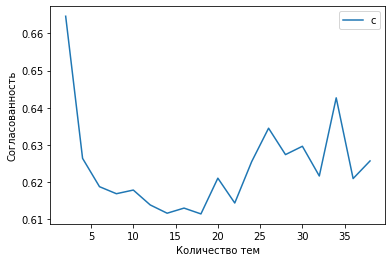

In [ ]:
import matplotlib.pyplot as plt
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

## ## Вывод: очень маленькое количество данных для обучения модели. Очень мало слов в каждом описании группы для обучения модели.